In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import minimize 
%matplotlib inline

import sys
sys.path.insert(0, '../automin/autodiff')
import variables as v
import AD_numpy as anp
import vector_variables as vv
sys.path.insert(0, '../automin')
import optimizer as op
import evaluate 


## demo cases

In [2]:
f1=lambda x, y : anp.sin(x-y)+y**2

In [3]:
v0_list = [[-10,10], [10,10], [10,-10]]

In [4]:
models=['Conjugate Gradient','Steepest Descend','BFGS','Gradient Descend']

In [5]:
res={}
for model in models:
    res[model]=[op.minimize(f1,v0,method=model,max_iter=10000,lr=1e-2) for v0 in v0_list]

In [6]:
for model in ['BFGS','CG']:
    res['scipy_'+model]=[minimize(lambda x:f1(*x),v0,method=model) for v0 in v0_list]

In [8]:
f_grid = f1(x_grid.reshape(1, -1),
                y_grid.reshape(-1, 1))

In [12]:
(0,f_grid.min())

-0.9999262647009676

C:\Users\Lenovo\Anaconda3\lib\site-packages\matplotlib\contour.py:1561: UserWarning: Log scale: values of z <= 0 have been masked
  warnings.warn('Log scale: values of z <= 0 have been masked')


ValueError: values must all be positive

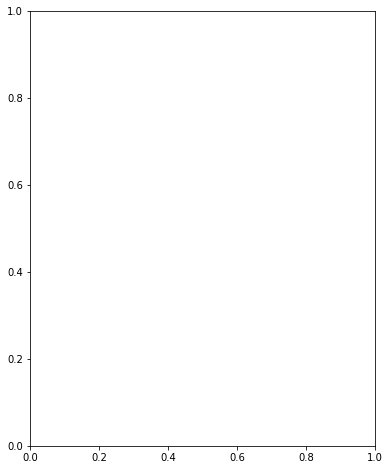

In [7]:
x_grid = np.linspace(-3, 4, 500)
y_grid = np.linspace(-4, 4, 500)
for model in models:
    evaluate.plot_path(f1, res[model], model, x_grid=x_grid, y_grid=y_grid)

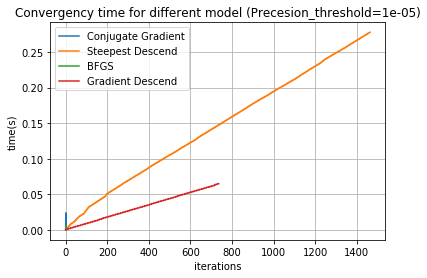

In [21]:
evaluate.plot_convergency([v[0].time_rec for k,v in res.items()],models)

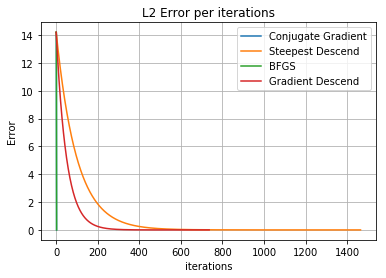

In [22]:
evaluate.plot_acc([v[0].val_rec for k,v in res.items()],[1,1],models)

In [84]:
def show_acc(val_lists,true,label_lists,norm='L2'):
    n = len(label_lists)

    if norm == 'L1':
        err = np.linalg.norm(np.array(val_lists)-np.array([1, 1]), 1, axis=-1)
    elif norm == 'L_inf':
        err = np.linalg.norm(np.array(val_lists) -
                             np.array([1, 1]), np.inf, axis=-1)
    else:
        err = np.linalg.norm(np.array(val_lists)-np.array([1, 1]), 2, axis=-1)
    for i,e in enumerate(err):
        print(norm+' error for {0:<20} is: {1:.2E}'.format(label_lists[i],e))

In [85]:
val,labels=[],[]
for k,v in res.items():
    val.append(v[0].x)
    labels.append(k)
show_acc(val,[1,1],labels)

L2 error for Conjugate Gradient   is: 4.41E-14
L2 error for Steepest Descend     is: 4.99E-06
L2 error for BFGS                 is: 1.78E-15
L2 error for Gradient Descend     is: 4.96E-06
L2 error for scipy_BFGS           is: 3.15E-06
L2 error for scipy_CG             is: 7.88E-10
